In [122]:
import numpy as np
import re
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(0)

In [241]:
def parse_text_file(text):
    data = text.split('\n')
    
    # reading P, N, M using re
    P, N, M = map(int, re.findall(r'\d+', data[1]))
    
    X = np.zeros((P,N))
    y = np.zeros((P,M))
    for i, line in enumerate(data[2: 2 + P]):
        nums = list(map(float, line.split()))
        X[i] = nums[:N]
        y[i] = nums[N:]
    return P, N, M, X, y

text_file = requests.get(
  'https://raw.githubusercontent.com/AgentSamBond/Maching_learning_study/'
  'main/4204_Technical_Neural_Networks/'
  '1_Single_layer_perceptron/'
  'PA-A_training_data_06.txt'
).text
print(text_file)

P, N, M, X, y = parse_text_file(
    text_file
    )
print(f'P = {P}, N = {N}, M = {M}')
print('X =', X)
print('y =', y)

#K<P
K = 6

# WS22/23_TNN_Assignment_PA-A_data_File_No_1_PA-A_training_data_05.txt
# P=8    N=6    M=2   
0.0 0.0 0.0 0.0 1.0 0.0     0.1 0.9
0.0 1.0 1.0 0.0 0.0 0.0     0.9 0.1
0.0 0.0 1.0 0.0 0.0 0.0     0.1 0.1
0.0 1.0 0.0 0.0 1.0 0.0     0.9 0.9
0.0 1.0 0.0 0.0 0.0 0.0     0.9 0.1
0.0 0.0 1.0 0.0 1.0 0.0     0.1 0.9
1.0 1.0 0.0 0.0 0.0 0.0     0.9 0.1
1.0 0.0 1.0 0.0 1.0 0.0     0.1 0.9


P = 8, N = 6, M = 2
X = [[0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]
y = [[0.1 0.9]
 [0.9 0.1]
 [0.1 0.1]
 [0.9 0.9]
 [0.9 0.1]
 [0.1 0.9]
 [0.9 0.1]
 [0.1 0.9]]


In [242]:
class RBF:
    def __init__(self, N, K, M):
        self.N = N
        self.M = M
        self.K = K
        
        #weights
        self.w = np.random.uniform(-0.5, 0.5, (self.K+1, self.M))
        
        #K RBF neurons [C, s]
        self.C = np.random.uniform(0, 1, (self.K, self.N))
        self.s = np.ones(self.K)
        
    def iterate(self, X):
        self.r = [np.ones(8)]
        for i in range(self.K):
            d = np.linalg.norm(X-self.C[i], axis=1)
            self.r.append(np.exp(-d**2/(2*(self.s[i]**2+0.000001))))
        y = np.transpose(self.r)@self.w
        return y
    
    def adjust_weights(self, y_pred, y, l = 0.1):
        self.w = self.w+l*np.array(self.r)@(y-y_pred)
    
    def adjust_RBF(self, X):
        #input data driven approach by k-means clustering
        kmeans = KMeans(n_clusters=self.K).fit(X)
        self.C = kmeans.cluster_centers_
        X_dist = kmeans.transform(X)
        X_dist = np.min(X_dist, axis=1)
        for i in range(K):
            self.s[i] = np.max(X_dist[np.where(kmeans.labels_ == i)])   
    
    def mean_square_error(self, y_pred, y):
        return np.sqrt(((y_pred - y)**2).mean(axis=None))
        

predictions: [[0.09643798 0.90346432]
 [0.53726991 0.06142346]
 [0.44834365 0.1059171 ]
 [0.89904685 0.5562208 ]
 [0.93424759 0.45804926]
 [0.09643802 0.90346428]
 [0.89643798 0.10346432]
 [0.09592629 0.90396198]]


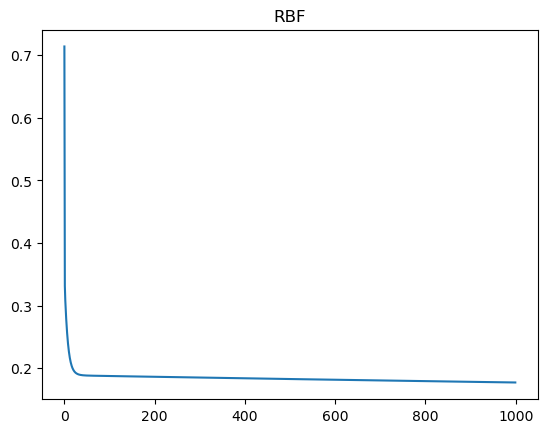

In [243]:
model = RBF(N=N, M=M, K=K)
model.adjust_RBF(X)

f = open("learning curve.txt", "w")
cycles_RBF = []
for i in range(1000):
        y_pred = model.iterate(X)
        model.adjust_weights(y_pred, y)
        cycles_RBF.append([
            i,
            model.mean_square_error(y_pred, y)
        ])
        f.write(str(model.mean_square_error(y_pred, y)))
        f.write('\n')
f.close()
print('predictions:', y_pred)

x, y = zip(*cycles_RBF)
plt.plot(x, y)
plt.title('RBF')
plt.show()

In [244]:
#validation
text_file = requests.get(
  'https://raw.githubusercontent.com/AgentSamBond/Maching_learning_study/main/'
  '4204_Technical_Neural_Networks/1_Single_layer_perceptron/'
  'PA-A_training_data_06.txt'
).text
print(text_file)

P, N, M, X, y = parse_text_file(
    text_file
    )
print(f'P = {P}, N = {N}, M = {M}')
print('X =', X)
print('y =', y)

y_pred = model.iterate(X)
print('predictions:', y_pred)

# WS22/23_TNN_Assignment_PA-A_data_File_No_1_PA-A_training_data_05.txt
# P=8    N=6    M=2   
0.0 0.0 0.0 0.0 1.0 0.0     0.1 0.9
0.0 1.0 1.0 0.0 0.0 0.0     0.9 0.1
0.0 0.0 1.0 0.0 0.0 0.0     0.1 0.1
0.0 1.0 0.0 0.0 1.0 0.0     0.9 0.9
0.0 1.0 0.0 0.0 0.0 0.0     0.9 0.1
0.0 0.0 1.0 0.0 1.0 0.0     0.1 0.9
1.0 1.0 0.0 0.0 0.0 0.0     0.9 0.1
1.0 0.0 1.0 0.0 1.0 0.0     0.1 0.9


P = 8, N = 6, M = 2
X = [[0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]
y = [[0.1 0.9]
 [0.9 0.1]
 [0.1 0.1]
 [0.9 0.9]
 [0.9 0.1]
 [0.1 0.9]
 [0.9 0.1]
 [0.1 0.9]]
predictions: [[0.09643846 0.90346385]
 [0.53729179 0.06140217]
 [0.44832053 0.10593958]
 [0.8990237  0.55624331]
 [0.93426945 0.458028  ]
 [0.09643849 0.90346382]
 [0.89643846 0.10346385]
 [0.09592683 0.90396145]]
